In [2]:
import requests
import json
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
year = "2022"
month = "8"
second = 28
second_str = str(second)

aug_data = pd.DataFrame()

for day in range(1, 32):
    day_str = str(day)
    for hour in range(0, 24):
        hour_str = str(hour)
        for minute in range(0, 60, 20):
            minute_str = str(minute)
            site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
            print(site)
            response_API = requests.get(site)
            data = response_API.text
            data = json.loads(data)
            minute_new = minute
            while (not "items" in data or (len(data["items"]) == 0 and minute_new < 60)):
                minute_new = minute_new + 1
                minute_str = str(minute_new)
                site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
                print(site)
                response_API = requests.get(site)
                data = response_API.text
                data = json.loads(data)
                
            timestamp = data["items"][0]["timestamp"]
            print(timestamp)

            data = data["items"][0]["carpark_data"]
            with open("EE4211data.json", 'w') as fp:
                json.dump(data, fp)
            dt = (pd.read_json("EE4211data.json"))
            for heading in ("total_lots","lot_type","lots_available"):
                dt[heading] = dt["carpark_info"].apply(lambda x: x[0][heading])
            dt = dt.drop(["carpark_info"], axis=1)
            aug_data = aug_data.append(dt)

# only to be run once
# to replicate the code and store data in a file, uncomment the line below
aug_data.to_csv("Aug2022_data_Q3.csv", index = False)

aug_data

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A01%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A02%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A03%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A04%3A28
2022-08-01T00:03:28+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A20%3A28
2022-08-01T00:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T00%3A40%3A28
2022-08-01T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T01%3A00%3A28
2022-08-01T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T01%3A20%3A28
2022-08-01T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpa

2022-08-01T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T22%3A20%3A28
2022-08-01T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T22%3A40%3A28
2022-08-01T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T23%3A00%3A28
2022-08-01T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T23%3A20%3A28
2022-08-01T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-01T23%3A40%3A28
2022-08-01T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T00%3A00%3A28
2022-08-02T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T00%3A20%3A28
2022-08-02T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T00%3A40%3A28
2022-08-02T00:40:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-02T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T21%3A40%3A28
2022-08-02T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T22%3A00%3A28
2022-08-02T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T22%3A20%3A28
2022-08-02T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T22%3A40%3A28
2022-08-02T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T23%3A00%3A28
2022-08-02T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T23%3A20%3A28
2022-08-02T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-02T23%3A40%3A28
2022-08-02T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T00%3A00%3A28
2022-08-03T00:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-03T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T21%3A00%3A28
2022-08-03T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T21%3A20%3A28
2022-08-03T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T21%3A40%3A28
2022-08-03T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T22%3A00%3A28
2022-08-03T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T22%3A20%3A28
2022-08-03T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T22%3A40%3A28
2022-08-03T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T23%3A00%3A28
2022-08-03T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-03T23%3A20%3A28
2022-08-03T23:20:26+08:00
https://api.data.gov.sg/v1/tra

2022-08-04T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T19%3A40%3A28
2022-08-04T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T20%3A00%3A28
2022-08-04T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T20%3A20%3A28
2022-08-04T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T20%3A40%3A28
2022-08-04T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T21%3A00%3A28
2022-08-04T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T21%3A20%3A28
2022-08-04T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T21%3A40%3A28
2022-08-04T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-04T22%3A00%3A28
2022-08-04T22:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-05T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T18%3A40%3A28
2022-08-05T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T19%3A00%3A28
2022-08-05T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T19%3A20%3A28
2022-08-05T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T19%3A40%3A28
2022-08-05T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T20%3A00%3A28
2022-08-05T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T20%3A20%3A28
2022-08-05T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T20%3A40%3A28
2022-08-05T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-05T21%3A00%3A28
2022-08-05T21:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-06T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T18%3A00%3A28
2022-08-06T18:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T18%3A20%3A28
2022-08-06T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T18%3A40%3A28
2022-08-06T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T19%3A00%3A28
2022-08-06T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T19%3A20%3A28
2022-08-06T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T19%3A40%3A28
2022-08-06T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T20%3A00%3A28
2022-08-06T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-06T20%3A20%3A28
2022-08-06T20:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-07T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T17%3A00%3A28
2022-08-07T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T17%3A20%3A28
2022-08-07T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T17%3A40%3A28
2022-08-07T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T18%3A00%3A28
2022-08-07T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T18%3A20%3A28
2022-08-07T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T18%3A40%3A28
2022-08-07T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T19%3A00%3A28
2022-08-07T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-07T19%3A20%3A28
2022-08-07T19:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-08T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T16%3A00%3A28
2022-08-08T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T16%3A20%3A28
2022-08-08T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T16%3A40%3A28
2022-08-08T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T17%3A00%3A28
2022-08-08T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T17%3A20%3A28
2022-08-08T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T17%3A40%3A28
2022-08-08T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T18%3A00%3A28
2022-08-08T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-08T18%3A20%3A28
2022-08-08T18:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-09T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T15%3A00%3A28
2022-08-09T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T15%3A20%3A28
2022-08-09T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T15%3A40%3A28
2022-08-09T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T16%3A00%3A28
2022-08-09T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T16%3A20%3A28
2022-08-09T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T16%3A40%3A28
2022-08-09T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T17%3A00%3A28
2022-08-09T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-09T17%3A20%3A28
2022-08-09T17:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-10T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T14%3A20%3A28
2022-08-10T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T14%3A40%3A28
2022-08-10T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T15%3A00%3A28
2022-08-10T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T15%3A20%3A28
2022-08-10T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T15%3A40%3A28
2022-08-10T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T16%3A00%3A28
2022-08-10T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T16%3A20%3A28
2022-08-10T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-10T16%3A40%3A28
2022-08-10T16:40:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-11T13:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T13%3A40%3A28
2022-08-11T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T14%3A00%3A28
2022-08-11T14:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T14%3A20%3A28
2022-08-11T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T14%3A40%3A28
2022-08-11T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T15%3A00%3A28
2022-08-11T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T15%3A20%3A28
2022-08-11T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T15%3A40%3A28
2022-08-11T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-11T16%3A00%3A28
2022-08-11T16:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-12T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T12%3A40%3A28
2022-08-12T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T13%3A00%3A28
2022-08-12T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T13%3A20%3A28
2022-08-12T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T13%3A40%3A28
2022-08-12T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T14%3A00%3A28
2022-08-12T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T14%3A20%3A28
2022-08-12T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T14%3A40%3A28
2022-08-12T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-12T15%3A00%3A28
2022-08-12T15:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-13T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T12%3A00%3A28
2022-08-13T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T12%3A20%3A28
2022-08-13T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T12%3A40%3A28
2022-08-13T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T13%3A00%3A28
2022-08-13T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T13%3A20%3A28
2022-08-13T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T13%3A40%3A28
2022-08-13T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T14%3A00%3A28
2022-08-13T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-13T14%3A20%3A28
2022-08-13T14:19:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-14T11:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T11%3A20%3A28
2022-08-14T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T11%3A40%3A28
2022-08-14T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T12%3A00%3A28
2022-08-14T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T12%3A20%3A28
2022-08-14T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T12%3A40%3A28
2022-08-14T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T13%3A00%3A28
2022-08-14T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T13%3A20%3A28
2022-08-14T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-14T13%3A40%3A28
2022-08-14T13:39:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-15T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T10%3A40%3A28
2022-08-15T10:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T11%3A00%3A28
2022-08-15T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T11%3A20%3A28
2022-08-15T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T11%3A40%3A28
2022-08-15T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T12%3A00%3A28
2022-08-15T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T12%3A20%3A28
2022-08-15T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T12%3A40%3A28
2022-08-15T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-15T13%3A00%3A28
2022-08-15T13:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-16T09:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T10%3A00%3A28
2022-08-16T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T10%3A20%3A28
2022-08-16T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T10%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T10%3A41%3A28
2022-08-16T10:41:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T11%3A00%3A28
2022-08-16T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T11%3A20%3A28
2022-08-16T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T11%3A40%3A28
2022-08-16T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-16T12%3A00%3A28
2022-08-16T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T08%3A20%3A28
2022-08-17T08:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T08%3A40%3A28
2022-08-17T08:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T09%3A00%3A28
2022-08-17T09:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T09%3A20%3A28
2022-08-17T09:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T09%3A40%3A28
2022-08-17T09:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T10%3A00%3A28
2022-08-17T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T10%3A20%3A28
2022-08-17T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-17T10%3A40%3A28
2022-08-17T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2022-08-18T05:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T05%3A40%3A28
2022-08-18T05:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T06%3A00%3A28
2022-08-18T06:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T06%3A20%3A28
2022-08-18T06:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T06%3A40%3A28
2022-08-18T06:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T07%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T07%3A01%3A28
2022-08-18T07:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T07%3A20%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T07%3A21%3A28
2022-08-18T07:21:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-18T07%

2022-08-19T01:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T01%3A20%3A28
2022-08-19T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T01%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T01%3A41%3A28
2022-08-19T01:41:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T02%3A00%3A28
2022-08-19T02:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T02%3A20%3A28
2022-08-19T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T02%3A40%3A28
2022-08-19T02:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T03%3A00%3A28
2022-08-19T03:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T03%3A20%3A28
2022-08-19T03:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2022-08-19T19:03:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T19%3A20%3A28
2022-08-19T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T19%3A40%3A28
2022-08-19T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T20%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T20%3A01%3A28
2022-08-19T20:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T20%3A20%3A28
2022-08-19T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T20%3A40%3A28
2022-08-19T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T21%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T21%3A01%3A28
2022-08-19T21:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-19T21%

2022-08-20T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T11%3A20%3A28
2022-08-20T11:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T11%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T11%3A41%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T11%3A42%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T11%3A43%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T11%3A44%3A28
2022-08-20T11:44:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T12%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T12%3A01%3A28
2022-08-20T12:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-20T12%3A20%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=

2022-08-21T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T01%3A20%3A28
2022-08-21T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T01%3A40%3A28
2022-08-21T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T02%3A00%3A28
2022-08-21T02:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T02%3A20%3A28
2022-08-21T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T02%3A40%3A28
2022-08-21T02:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T03%3A00%3A28
2022-08-21T03:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T03%3A20%3A28
2022-08-21T03:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-21T03%3A40%3A28
2022-08-21T03:40:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-22T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T00%3A20%3A28
2022-08-22T00:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T00%3A40%3A28
2022-08-22T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T01%3A00%3A28
2022-08-22T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T01%3A20%3A28
2022-08-22T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T01%3A40%3A28
2022-08-22T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T02%3A00%3A28
2022-08-22T02:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T02%3A20%3A28
2022-08-22T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T02%3A40%3A28
2022-08-22T02:40:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-22T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-22T23%3A40%3A28
2022-08-22T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T00%3A00%3A28
2022-08-23T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T00%3A20%3A28
2022-08-23T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T00%3A40%3A28
2022-08-23T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T01%3A00%3A28
2022-08-23T00:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T01%3A20%3A28
2022-08-23T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T01%3A40%3A28
2022-08-23T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T02%3A00%3A28
2022-08-23T02:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-23T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T23%3A00%3A28
2022-08-23T23:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T23%3A20%3A28
2022-08-23T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-23T23%3A40%3A28
2022-08-23T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T00%3A00%3A28
2022-08-24T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T00%3A20%3A28
2022-08-24T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T00%3A40%3A28
2022-08-24T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T01%3A00%3A28
2022-08-24T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T01%3A20%3A28
2022-08-24T01:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-24T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T22%3A20%3A28
2022-08-24T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T22%3A40%3A28
2022-08-24T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T23%3A00%3A28
2022-08-24T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T23%3A20%3A28
2022-08-24T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-24T23%3A40%3A28
2022-08-24T23:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T00%3A00%3A28
2022-08-25T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T00%3A20%3A28
2022-08-25T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T00%3A40%3A28
2022-08-25T00:40:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-25T21:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T21%3A40%3A28
2022-08-25T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T22%3A00%3A28
2022-08-25T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T22%3A20%3A28
2022-08-25T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T22%3A40%3A28
2022-08-25T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T23%3A00%3A28
2022-08-25T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T23%3A20%3A28
2022-08-25T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-25T23%3A40%3A28
2022-08-25T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T00%3A00%3A28
2022-08-26T00:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-26T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T21%3A00%3A28
2022-08-26T21:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T21%3A20%3A28
2022-08-26T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T21%3A40%3A28
2022-08-26T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T22%3A00%3A28
2022-08-26T21:44:08+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T22%3A20%3A28
2022-08-26T21:44:08+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T22%3A40%3A28
2022-08-26T21:44:08+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T23%3A00%3A28
2022-08-26T22:58:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-26T23%3A20%3A28
2022-08-26T23:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-27T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T20%3A00%3A28
2022-08-27T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T20%3A20%3A28
2022-08-27T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T20%3A40%3A28
2022-08-27T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T21%3A00%3A28
2022-08-27T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T21%3A20%3A28
2022-08-27T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T21%3A40%3A28
2022-08-27T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T22%3A00%3A28
2022-08-27T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-27T22%3A20%3A28
2022-08-27T22:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-28T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T19%3A00%3A28
2022-08-28T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T19%3A20%3A28
2022-08-28T19:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T19%3A40%3A28
2022-08-28T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T20%3A00%3A28
2022-08-28T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T20%3A20%3A28
2022-08-28T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T20%3A40%3A28
2022-08-28T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T21%3A00%3A28
2022-08-28T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-28T21%3A20%3A28
2022-08-28T21:20:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-29T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T18%3A20%3A28
2022-08-29T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T18%3A40%3A28
2022-08-29T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T19%3A00%3A28
2022-08-29T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T19%3A20%3A28
2022-08-29T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T19%3A40%3A28
2022-08-29T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T20%3A00%3A28
2022-08-29T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T20%3A20%3A28
2022-08-29T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-29T20%3A40%3A28
2022-08-29T20:40:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-30T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T17%3A40%3A28
2022-08-30T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T18%3A00%3A28
2022-08-30T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T18%3A20%3A28
2022-08-30T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T18%3A40%3A28
2022-08-30T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T19%3A00%3A28
2022-08-30T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T19%3A20%3A28
2022-08-30T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T19%3A40%3A28
2022-08-30T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-30T20%3A00%3A28
2022-08-30T20:00:27+08:00
https://api.data.gov.sg/v1/tra

2022-08-31T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T17%3A00%3A28
2022-08-31T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T17%3A20%3A28
2022-08-31T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T17%3A40%3A28
2022-08-31T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T18%3A00%3A28
2022-08-31T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T18%3A20%3A28
2022-08-31T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T18%3A40%3A28
2022-08-31T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T19%3A00%3A28
2022-08-31T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-08-31T19%3A20%3A28
2022-08-31T19:20:27+08:00
https://api.data.gov.sg/v1/tra

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-08-01T00:02:39,105,C,67
1,HLM,2022-08-01T00:03:03,583,C,501
2,RHM,2022-08-01T00:02:39,329,C,123
3,BM29,2022-08-01T00:02:49,97,C,84
4,Q81,2022-08-01T00:03:00,96,C,77
...,...,...,...,...,...
1963,B65M,2022-08-31T23:38:24,679,C,321
1964,B65L,2022-08-31T23:38:24,5,C,2
1965,BE3,2022-08-31T23:38:47,306,C,60
1966,BE3R,2022-08-31T23:38:47,195,C,77


## Data Cleaning

In [11]:
aug_data_df = pd.read_csv("Aug2022_data_Q3.csv")
aug_data_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-08-01T00:02:39,105,C,67
1,HLM,2022-08-01T00:03:03,583,C,501
2,RHM,2022-08-01T00:02:39,329,C,123
3,BM29,2022-08-01T00:02:49,97,C,84
4,Q81,2022-08-01T00:03:00,96,C,77
...,...,...,...,...,...
4389669,B65M,2022-08-31T23:38:24,679,C,321
4389670,B65L,2022-08-31T23:38:24,5,C,2
4389671,BE3,2022-08-31T23:38:47,306,C,60
4389672,BE3R,2022-08-31T23:38:47,195,C,77


In [12]:
aug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389674 entries, 0 to 4389673
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
dtypes: int64(2), object(3)
memory usage: 167.5+ MB


In [13]:
aug_data_df.drop_duplicates(inplace = True, ignore_index = True)
aug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076419 entries, 0 to 4076418
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
dtypes: int64(2), object(3)
memory usage: 155.5+ MB


In [14]:
aug_data_df["update_datetime"] = pd.to_datetime(aug_data_df["update_datetime"])
aug_data_df["lots_available"] = pd.to_numeric(aug_data_df["lots_available"])
aug_data_df["total_lots"] = pd.to_numeric(aug_data_df["total_lots"])

aug_data_df["minute"] = aug_data_df["update_datetime"].dt.minute
aug_data_df["date"] = aug_data_df["update_datetime"].dt.date
aug_data_df["hour"] = aug_data_df["update_datetime"].dt.hour
aug_data_df["day"] = aug_data_df["update_datetime"].dt.day
aug_data_df["percent_lots_available"] = (aug_data_df["lots_available"]/aug_data_df["total_lots"]) * 100
aug_data_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:02:39,105,C,67,2,2022-08-01,0,1,63.809524
1,HLM,2022-08-01 00:03:03,583,C,501,3,2022-08-01,0,1,85.934820
2,RHM,2022-08-01 00:02:39,329,C,123,2,2022-08-01,0,1,37.386018
3,BM29,2022-08-01 00:02:49,97,C,84,2,2022-08-01,0,1,86.597938
4,Q81,2022-08-01 00:03:00,96,C,77,3,2022-08-01,0,1,80.208333


In [15]:
aug_data_cleaned = aug_data_df.loc[aug_data_df['date'] >= datetime.date(2022, 8, 1)]
aug_data_cleaned = aug_data_cleaned.loc[aug_data_df['date'] < datetime.date(2022, 9, 1)]
aug_data_cleaned.groupby('date').groups.keys()   

dict_keys([datetime.date(2022, 8, 1), datetime.date(2022, 8, 2), datetime.date(2022, 8, 3), datetime.date(2022, 8, 4), datetime.date(2022, 8, 5), datetime.date(2022, 8, 6), datetime.date(2022, 8, 7), datetime.date(2022, 8, 8), datetime.date(2022, 8, 9), datetime.date(2022, 8, 10), datetime.date(2022, 8, 11), datetime.date(2022, 8, 12), datetime.date(2022, 8, 13), datetime.date(2022, 8, 14), datetime.date(2022, 8, 15), datetime.date(2022, 8, 16), datetime.date(2022, 8, 17), datetime.date(2022, 8, 18), datetime.date(2022, 8, 19), datetime.date(2022, 8, 20), datetime.date(2022, 8, 21), datetime.date(2022, 8, 22), datetime.date(2022, 8, 23), datetime.date(2022, 8, 24), datetime.date(2022, 8, 25), datetime.date(2022, 8, 26), datetime.date(2022, 8, 27), datetime.date(2022, 8, 28), datetime.date(2022, 8, 29), datetime.date(2022, 8, 30), datetime.date(2022, 8, 31)])

In [16]:
# dropping rows with NaN values
aug_data_cleaned = aug_data_cleaned.dropna()
aug_data_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:02:39,105,C,67,2,2022-08-01,0,1,63.809524
1,HLM,2022-08-01 00:03:03,583,C,501,3,2022-08-01,0,1,85.934820
2,RHM,2022-08-01 00:02:39,329,C,123,2,2022-08-01,0,1,37.386018
3,BM29,2022-08-01 00:02:49,97,C,84,2,2022-08-01,0,1,86.597938
4,Q81,2022-08-01 00:03:00,96,C,77,3,2022-08-01,0,1,80.208333
...,...,...,...,...,...,...,...,...,...,...
4076414,B65M,2022-08-31 23:38:24,679,C,321,38,2022-08-31,23,31,47.275405
4076415,B65L,2022-08-31 23:38:24,5,C,2,38,2022-08-31,23,31,40.000000
4076416,BE3,2022-08-31 23:38:47,306,C,60,38,2022-08-31,23,31,19.607843
4076417,BE3R,2022-08-31 23:38:47,195,C,77,38,2022-08-31,23,31,39.487179


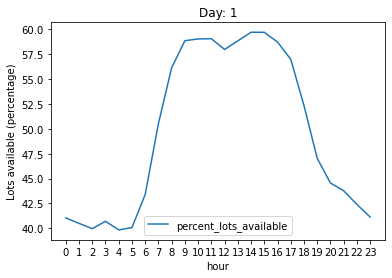

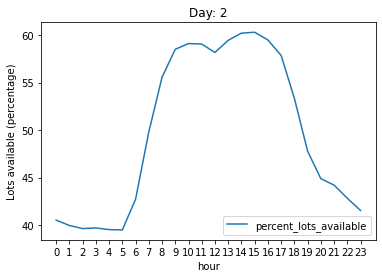

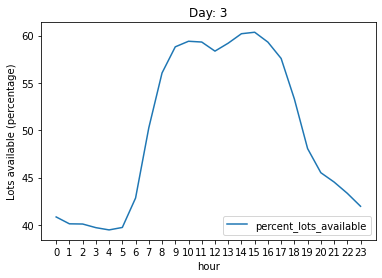

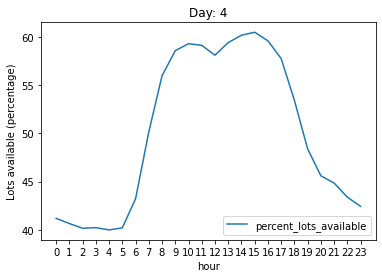

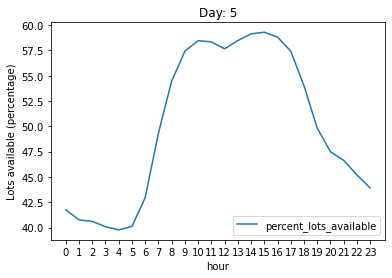

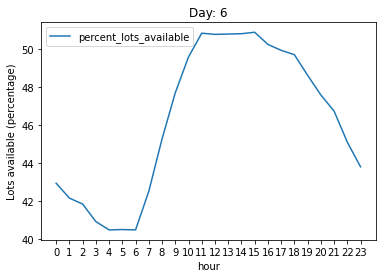

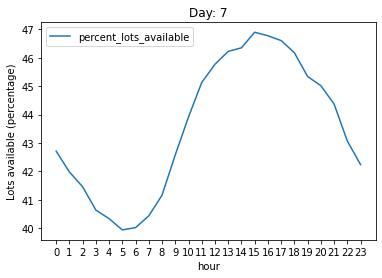

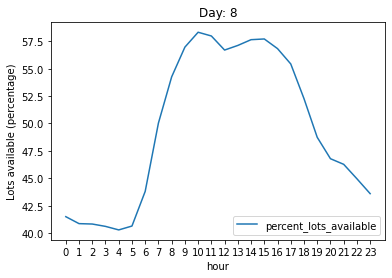

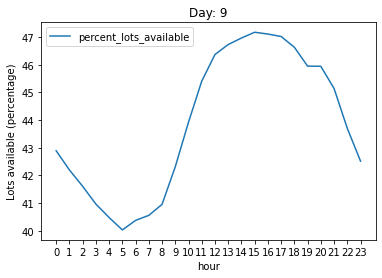

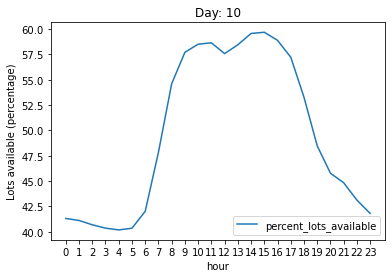

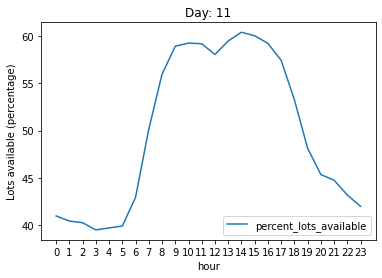

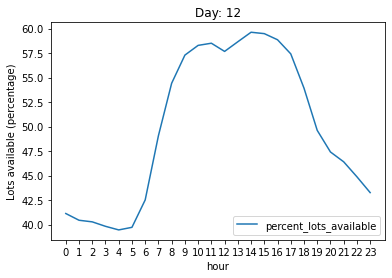

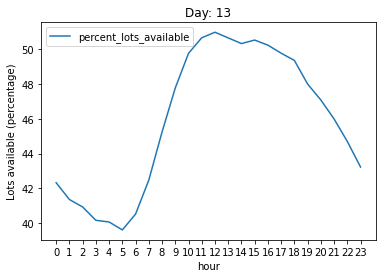

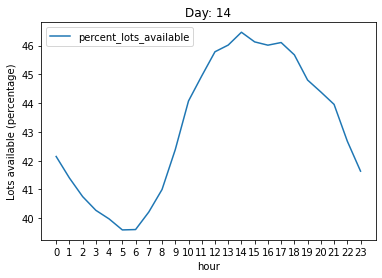

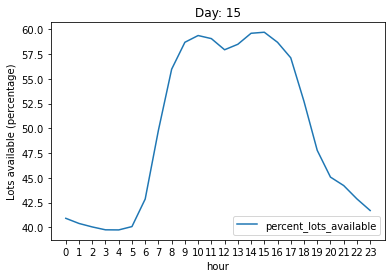

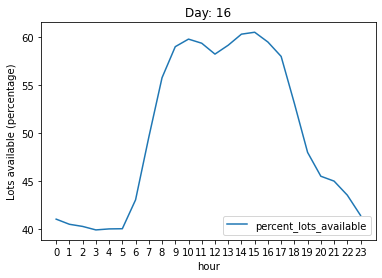

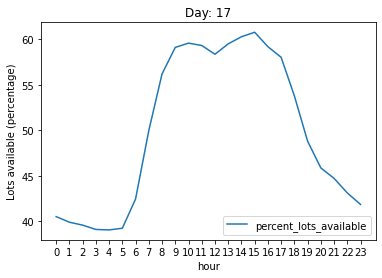

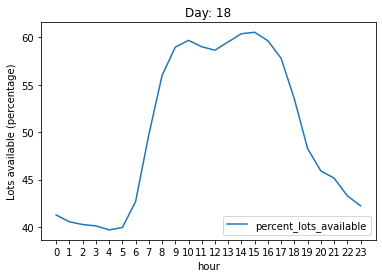

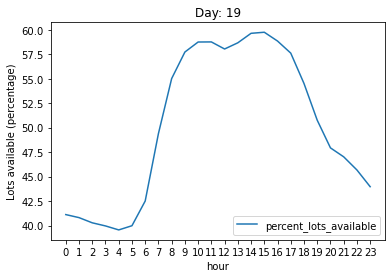

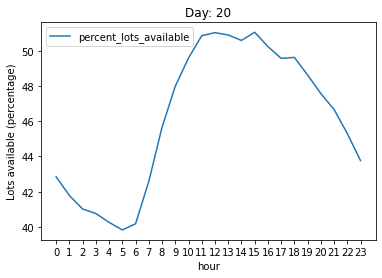

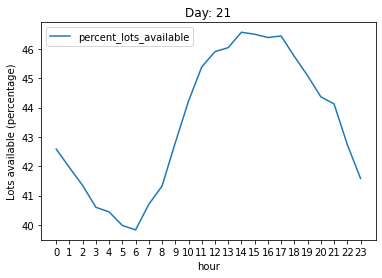

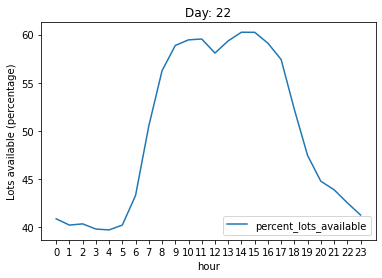

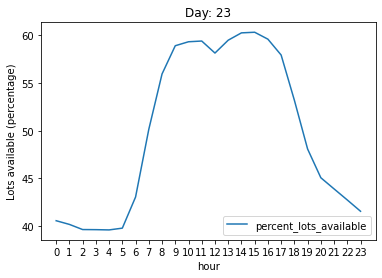

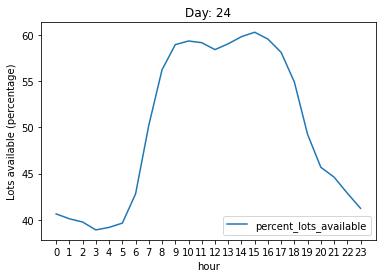

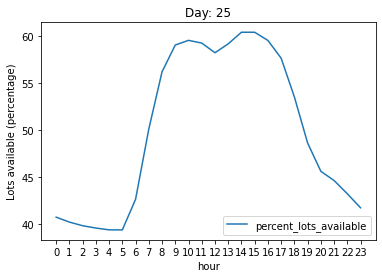

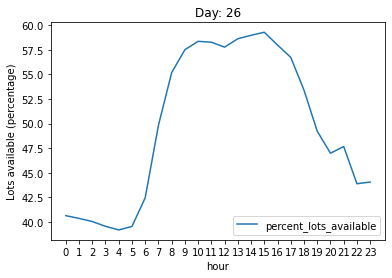

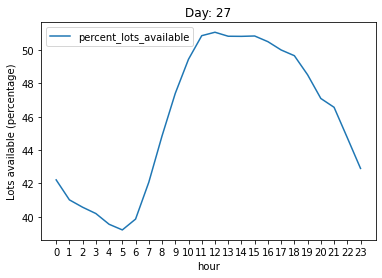

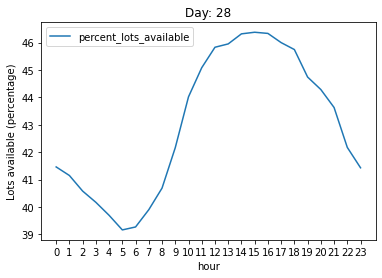

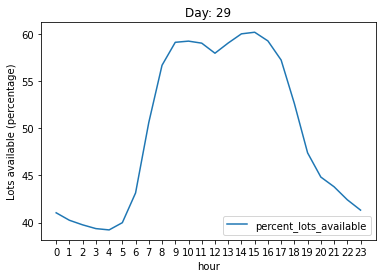

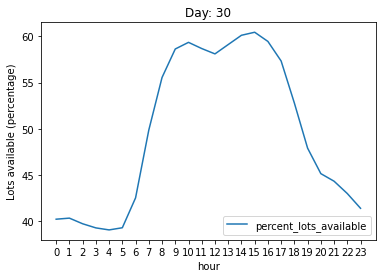

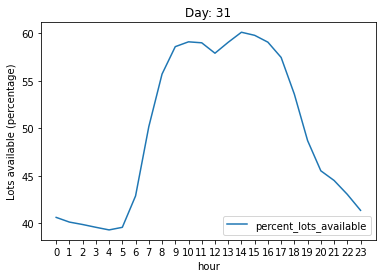

In [17]:
aug_data_daily = aug_data_cleaned.groupby("day", as_index = False)
for day in aug_data_daily.groups.keys():
    day_data = aug_data_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    title = "Day: " + str(day)
    hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
                         ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])

In [18]:
aug_data_cleaned.to_csv("aug22_data_cleaned.csv", index = False)